<a href="https://colab.research.google.com/github/natreis02/Bootcamp/blob/main/Atividade_estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ESTATÍSTICA -  PROBABILIDADE E AMOSTRAGEM - DESAFIO FINAL


Você é uma pesquisadora desenvolvendo uma análise sobre as características da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:

1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma
pessoa aleatória e ela não ser fluente em inglês. Considere fluente
quem tem o nível avançado.

In [ ]:
import pandas as pd
from google.colab import files

# Selecionar arquivo
uploaded = files.upload()

# Carregar o arquivo CSV em um DataFrame
nome_arquivo = next(iter(uploaded))
df = pd.read_csv('populacao_brasileira.csv.csv')

# Exibir os nomes das colunas
print("Nomes das colunas do DataFrame:")
print(df.columns)

In [ ]:
# Contar o número de pessoas fluentes em inglês (nível avançado)
fluentes_ingles = df[df['nível de proficiência em inglês'] == 'Avançado']

# Calcular a probabilidade complementar
probabilidade_complementar = 1 - len(fluentes_ingles) / len(df)

# Exibir o resultado
print("Probabilidade complementar de escolher um não fluente em inglês:", probabilidade_complementar)


Probabilidade complementar de escolher um não fluente em inglês: 0.656


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará,
qual é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [ ]:
# Filtrar pessoas de Alagoas ou do Pará
alagoas_para = df[(df['estado'] == 'AL') | (df['estado'] == 'PA')]

# Verificar se há pessoas de Alagoas ou do Pará no conjunto de dados
if len(alagoas_para) == 0:
    print("Não há pessoas de Alagoas ou do Pará no conjunto de dados.")
else:
    # Filtrar pessoas com renda superior a 5 mil reais
    renda_superior_5mil = alagoas_para[alagoas_para['renda'] > 5000]

    # Verificar se há pessoas com renda superior a 5 mil reais em Alagoas ou Pará
    if len(renda_superior_5mil) == 0:
        print("Não há pessoas de Alagoas ou do Pará com renda superior a 5 mil reais.")
    else:
        # Calcular a probabilidade
        total_alagoas_para = len(alagoas_para)
        total_renda_superior_5mil = len(renda_superior_5mil)
        probabilidade_renda_superior_5mil = total_renda_superior_5mil / total_alagoas_para

        # Exibir o resultado
        print("Probabilidade de uma pessoa de Alagoas ou do Pará ter uma renda superior a 5 mil reais:", probabilidade_renda_superior_5mil)


Probabilidade de uma pessoa de Alagoas ou do Pará ter uma renda superior a 5 mil reais: 0.05063291139240506


3. Descubra a probabilidade de uma pessoa ter ensino superior completo
no estado do Amazonas. Qual a probabilidade da quinta pessoa que
você conversar, que é amazonense, ter ensino superior completo?

In [ ]:
# Calcular a probabilidade de uma pessoa no Amazonas ter ensino superior completo
total_amazonenses = df[df['estado'] == 'AM'].shape[0]
amazonenses_com_ensino_superior = df[(df['estado'] == 'AM') & (df['escolaridade'] == 'Superior')].shape[0]
probabilidade_amazonense_ensino_superior = amazonenses_com_ensino_superior / total_amazonenses

print("Probabilidade de uma pessoa no Amazonas ter ensino superior completo:", probabilidade_amazonense_ensino_superior)

# Calculando a probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo
def prob_quinta_pessoa_com_ensino_superior(df):
    amazonenses = df[df['estado'] == 'AM']
    fifth_person = amazonenses.sample(n=5, random_state=42).iloc[-1]
    return fifth_person['escolaridade'] == 'Superior'

num_simulacoes = 100000
probabilidade_quinta_pessoa_ensino_superior = sum(prob_quinta_pessoa_com_ensino_superior(df) for _ in range(num_simulacoes)) / num_simulacoes

print("Probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo:", probabilidade_quinta_pessoa_ensino_superior)


Probabilidade de uma pessoa no Amazonas ter ensino superior completo: 0.23684210526315788
Probabilidade da quinta pessoa que você conversar, que é amazonense, ter ensino superior completo: 0.0


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de
probabilidade?


In [ ]:
# Definir a largura da faixa de renda
largura_faixa = 1500

# Criar faixas de renda
faixas_renda = range(0, int(df['renda'].max()) + largura_faixa, largura_faixa)

# Contar o número de pessoas em cada faixa de renda
contagem_por_faixa = pd.cut(df['renda'], bins=faixas_renda, include_lowest=True).value_counts().sort_index()

# Calcular a função densidade de probabilidade (PDF)
total_pessoas = len(df)
pdf = contagem_por_faixa / (total_pessoas * largura_faixa)

# Encontrar a faixa de renda com a maior densidade de probabilidade
faixa_mais_probavel = pdf.idxmax()

# Exibir os resultados
print("Contagem de pessoas em cada faixa de renda:")
print(contagem_por_faixa)
print("\nFunção densidade de probabilidade (PDF):")
print(pdf)
print("\nFaixa de renda com a maior densidade de probabilidade:", faixa_mais_probavel)


Contagem de pessoas em cada faixa de renda:
(-0.001, 1500.0]     55
(1500.0, 3000.0]    414
(3000.0, 4500.0]    442
(4500.0, 6000.0]     89
Name: renda, dtype: int64

Função densidade de probabilidade (PDF):
(-0.001, 1500.0]    0.000037
(1500.0, 3000.0]    0.000276
(3000.0, 4500.0]    0.000295
(4500.0, 6000.0]    0.000059
Name: renda, dtype: float64

Faixa de renda com a maior densidade de probabilidade: (3000.0, 4500.0]


5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico

Média da renda: 3082.5371800000003
Variância da renda: 993156.2281676152


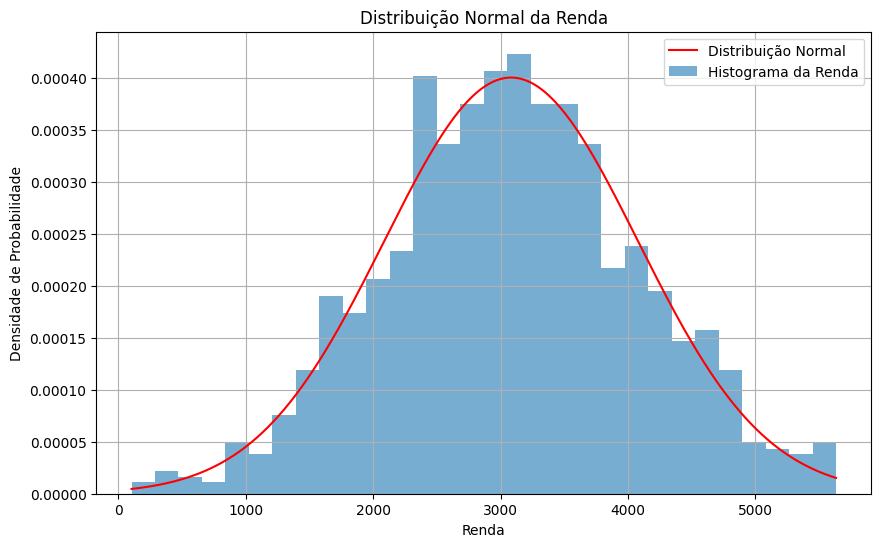

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Calcular média e variância da renda da amostra
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()

# Imprimir média e variância
print("Média da renda:", media_renda)
print("Variância da renda:", variancia_renda)

# Criar a distribuição normal teórica
renda_min = df['renda'].min()
renda_max = df['renda'].max()
x = np.linspace(renda_min, renda_max, 1000)
pdf = norm.pdf(x, media_renda, np.sqrt(variancia_renda))

# Plotar a distribuição normal
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Distribuição Normal', color='red')
plt.hist(df['renda'], bins=30, density=True, alpha=0.6, label='Histograma da Renda')
plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()


6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra
de população brasileira com 1 milhão de habitantes, qual a
probabilidade de encontrarmos 243 mil pessoas com pós-graduação?

In [ ]:
from scipy.stats import binom

# Calcular o número de pessoas com pós-graduação
total_pos_grad = len(df[df['escolaridade'] == 'Pós-graduação'])

# Tamanho total do conjunto de dados
total_pessoas = len(df)

# Calcular a probabilidade de uma pessoa ter pós-graduação
probabilidade_pos_grad = total_pos_grad / total_pessoas

print("Probabilidade de uma pessoa ter pós-graduação:", probabilidade_pos_grad)

# Tamanho da população (número de tentativas)
n = 1000000

# Número de sucessos desejados (número de pessoas com pós-graduação)
k = 243000

# Probabilidade de sucesso em uma única tentativa (probabilidade de uma pessoa ter pós-graduação)
probabilidade_pos_grad = total_pos_grad / total_pessoas

# Calcular a probabilidade usando a distribuição binomial
probabilidade = binom.pmf(k, n, probabilidade_pos_grad)

# Exibir o resultado
print("Probabilidade de encontrar 243 mil pessoas com pós-graduação em uma amostra de 1 milhão de habitantes:", probabilidade)



Probabilidade de uma pessoa ter pós-graduação: 0.253
Probabilidade de encontrar 243 mil pessoas com pós-graduação em uma amostra de 1 milhão de habitantes: 1.1104854289794913e-119


7. Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.

In [ ]:
import pandas as pd

# Calcular a frequência de cada nível de escolaridade
frequencia_escolaridade = df['escolaridade'].value_counts()

# Calcular a densidade de probabilidade para cada nível de escolaridade
total_pessoas = len(df)
densidade_probabilidade_escolaridade = frequencia_escolaridade / total_pessoas

# Calcular a função de densidade acumulada discreta
densidade_acumulada_escolaridade = densidade_probabilidade_escolaridade.cumsum()

# Exibir a função de densidade acumulada discreta para cada nível de escolaridade
print("Função de densidade acumulada discreta para cada nível de escolaridade:")
print(densidade_acumulada_escolaridade)


Função de densidade acumulada discreta para cada nível de escolaridade:
Fundamental      0.266
Pós-graduação    0.519
Superior         0.762
Médio            1.000
Name: escolaridade, dtype: float64


8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês
intermediário?

In [ ]:
import numpy as np

# Definir o tamanho da amostra (suponha que seja 1000 para este exemplo)
n = 1000

# Definir a proporção da população (proporção de pessoas com nível de inglês intermediário)
proporcao_populacao = df[df['nível de proficiência em inglês'] == 'Intermediário'].shape[0] / len(df)

# Definir o escore z para um nível de confiança de 95% (1.96 para uma distribuição normal padrão)
z = 1.96

# Calcular a margem de erro amostral
margem_erro = z * np.sqrt((proporcao_populacao * (1 - proporcao_populacao)) / n)

print("Margem de erro amostral da proporção populacional:", margem_erro)


Margem de erro amostral da proporção populacional: 0.029121603225097343


9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?


In [ ]:
from scipy.stats import binom

# Tamanho da população (número de tentativas)
n = len(df)

# Número de sucessos desejados (número de pessoas com uma renda mil reais superior à média)
k = 60

# Média da renda da população
media_renda = df['renda'].mean()

# Probabilidade de sucesso em uma única tentativa (probabilidade de uma pessoa ter uma renda mil reais superior à média)
# Supondo que a renda média seja a média da população
probabilidade_superior_media = sum(df['renda'] > media_renda + 1000) / n

# Calcular a probabilidade usando a distribuição binomial
probabilidade = binom.pmf(k, n, probabilidade_superior_media)

# Exibir o resultado
print("Probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média:", probabilidade)


Probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média: 1.099520565163774e-22


10) Qual a probabilidade de escolhermos alguém do Sudeste que seja
homem, com ensino fundamental e com renda maior que 2 mil reais por
mês?

In [ ]:
# Definir os estados do Sudeste
estados_sudeste = ['SP', 'MG', 'RJ', 'ES']

# Filtrar o DataFrame para incluir apenas as pessoas do Sudeste que sejam homens e tenham ensino fundamental
sudeste_homens_ensino_fundamental = df[(df['estado'].isin(estados_sudeste)) & (df['sexo'] == 'Masculino') & (df['escolaridade'] == 'Fundamental')]

# Verificar se há pessoas no subconjunto antes de calcular a probabilidade
if len(sudeste_homens_ensino_fundamental) == 0:
    print("Não há pessoas no Sudeste que sejam homens e tenham ensino fundamental.")
else:
    # Contar quantas pessoas têm renda maior que 2 mil reais por mês dentro desse subconjunto
    renda_maior_2mil = sudeste_homens_ensino_fundamental[sudeste_homens_ensino_fundamental['renda'] > 2000].shape[0]

    # Calcular a probabilidade com base no número de pessoas com renda maior que 2 mil reais dividido pelo número total de pessoas no subconjunto
    total_pessoas = len(sudeste_homens_ensino_fundamental)
    probabilidade = renda_maior_2mil / total_pessoas

    # Exibir o resultado
    print("Probabilidade de escolhermos alguém do Sudeste (SP, MG, RJ, ES), homem, com ensino fundamental e com renda maior que 2 mil reais por mês:", probabilidade)

Não há pessoas no Sudeste que sejam homens e tenham ensino fundamental.
